In [66]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'e49b0559-1247-46bd-8880-56c0b1432d9e',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-06-16T09:49:22.456Z', 'error_code': 0, 'error_message': None, 'elapsed': 1, 'credit_count': 1, 'notice': None}, 'data': [{'id': 7430, 'name': 'm8828kg9b8', 'symbol': 'rt1h11ywhcc', 'slug': 'swb3kdkf9g', 'cmc_rank': 4300, 'num_market_pairs': 4218, 'circulating_supply': 5343, 'total_supply': 7726, 'max_supply': 6211, 'infinite_supply': None, 'last_updated': '2024-06-16T09:49:22.456Z', 'date_added': '2024-06-16T09:49:22.456Z', 'tags': ['c97aq7grkkg', 'ifqy2toyxvf', 'oi5fre5n8s', 'ezbz0hy9fnu', 'ruz6okthvvl', 'm6ww8elf01i', 'mcrtww52cvd', 'xkawe9bwooq', '6lirv67cr7p', 'gv72hzmeidv'], 'platform': None, 'self_reported_circulating_supply': None, 'self_reported_market_cap': None, 'quote': {'USD': {'price': 0.6053300816212666, 'volume_24h': 5124, 'volume_change_24h': 0.12422108932666442, 'percent_change_1h': 0.6128484010803037, 'percent_change_24h': 0.4400294961138964, 'percent_change_7d': 0.14943036903969387, 'market_cap': 0.8693245092453175, 'market_cap_dominanc

In [67]:
type(data)

dict

In [68]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [69]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,cmc_rank,num_market_pairs,circulating_supply,total_supply,max_supply,infinite_supply,last_updated,date_added,tags,platform,self_reported_circulating_supply,self_reported_market_cap,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,timestamp
0,7430,m8828kg9b8,rt1h11ywhcc,swb3kdkf9g,4300,4218,5343,7726,6211,None,2024-06-16T09:49:22.456Z,2024-06-16T09:49:22.456Z,"[c97aq7grkkg, ifqy2toyxvf, oi5fre5n8s, ezbz0hy...",None,None,None,0.60533,5124,0.12422,0.61285,0.44003,0.14943,0.86932,8154,0.54287,2024-06-16T09:49:22.456Z,2024-06-16 12:49:22.905415
1,9982,y8svedj19j9,5st81zi085,5ihd4ihsc29,9053,8326,8757,360,3771,None,2024-06-16T09:49:22.456Z,2024-06-16T09:49:22.456Z,"[zw25k3et5f, xbx9nhzxwtr, 9wor1nt3xn, gaofqflz...",None,None,None,0.36591,3975,0.31812,0.03857,0.19980,0.11418,0.28732,7971,0.68377,2024-06-16T09:49:22.456Z,2024-06-16 12:49:22.905415
2,61,y4ivhce8yzn,hadq25qs8tl,9hmu4vekw6w,4702,5598,6420,2697,8245,None,2024-06-16T09:49:22.456Z,2024-06-16T09:49:22.456Z,"[yad5sbmnyqq, wb7hnc0q49j, j9jri5q021, e36h5zm...",None,None,None,0.08702,970,0.22686,0.89371,0.56063,0.54142,0.14465,122,0.88596,2024-06-16T09:49:22.456Z,2024-06-16 12:49:22.905415
3,4153,o744zs7cu1,epv0nezdeur,b2tsaa08c6e,798,7,4042,8900,3304,None,2024-06-16T09:49:22.456Z,2024-06-16T09:49:22.456Z,"[f1ikblezjae, gk5bv5uaro, rgjxywomnsd, zh7368q...",None,None,None,0.97584,6359,0.19127,0.54164,0.33720,0.25594,0.63402,3267,0.60560,2024-06-16T09:49:22.456Z,2024-06-16 12:49:22.905415
4,8970,9z3fauxn2sh,u7gg9b3nn5,eivip1460ec,1779,827,6669,167,2341,None,2024-06-16T09:49:22.456Z,2024-06-16T09:49:22.456Z,"[hzmmb1rlhdt, pg5l5p8jwo, dwyvev2svhh, js23wnk...",None,None,None,0.14034,9260,0.63372,0.25820,0.59781,0.78423,0.06317,4287,0.23252,2024-06-16T09:49:22.456Z,2024-06-16 12:49:22.905415
5,5280,hyfhlhwkwh,hvj6dj5zd6b,frs6mrgisyi,7782,6490,5044,3500,3167,None,2024-06-16T09:49:22.456Z,2024-06-16T09:49:22.456Z,"[vajvhaki40a, msqdiuuzwem, z21d9epdg4, zivuqgq...",None,None,None,0.80118,6603,0.90540,0.73033,0.01416,0.81170,0.14757,2742,0.51792,2024-06-16T09:49:22.456Z,2024-06-16 12:49:22.905415
6,5029,e5mnapvjg0h,eez1i0iq7v,xcl9q2xe3w,4579,1160,3825,3541,9599,None,2024-06-16T09:49:22.456Z,2024-06-16T09:49:22.456Z,"[1j8jo6jt616, uvdiyhvje9, e2ujm71si5u, smlfxw9...",None,None,None,0.22214,495,0.02082,0.59881,0.51750,0.82516,0.07087,4683,0.06577,2024-06-16T09:49:22.456Z,2024-06-16 12:49:22.905415
7,5409,a4f642qh5if,2fgk0jixcyk,3bwubvqpad4,5854,8098,6913,2875,6513,None,2024-06-16T09:49:22.456Z,2024-06-16T09:49:22.456Z,"[iwzn3s57x1, btwxwbfq2ln, x3zgses1d2a, lr9t5t1...",None,None,None,0.42663,8680,0.22997,0.40789,0.00297,0.28838,0.26142,3803,0.73559,2024-06-16T09:49:22.456Z,2024-06-16 12:49:22.905415
8,7187,3coumx313t,b23oi4su37u,4sovx9qz81f,7036,7033,5884,356,7569,None,2024-06-16T09:49:22.456Z,2024-06-16T09:49:22.456Z,"[283c11quhnoj, x6sda5qs5b, lat75s8mstk, 989jxe...",None,None,None,0.34439,7128,0.26491,0.51369,0.12548,0.39655,0.71807,5134,0.88017,2024-06-16T09:49:22.456Z,2024-06-16 12:49:22.905415
9,2384,2e58sd9loyj,r8377jd9og,ddbuhfyf08s,594,3352,4175,3352,4576,None,2024-06-16T09:49:22.456Z,2024-06-16T09:49:22.456Z,"[squug5v247q, wk83jqydssq, haongjc6z9l, k4zrk2...",None,None,None,0.84309,922,0.81408,0.31829,0.71597,0.65812,0.75740,3307,0.21497,2024-06-16T09:49:22.456Z,2024-06-16 12:49:22.905415


In [70]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'e49b0559-1247-46bd-8880-56c0b1432d9e',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df2,df_append])


    # Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

    #if not os.path.isfile(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv'):
        #df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')

# If that didn't work try using the local host URL as shown in the video

In [71]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(5) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed



KeyboardInterrupt



In [72]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,11109,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19712953.00000,19712953.00000,False,NaN,1,NaN,NaN,None,2024-06-16T09:48:00.000Z,66322.63461,12161804720.29062,-52.42340,0.14624,0.25849,-4.37575,0.00880,4.67847,-2.48705,1307414978983.56812,54.08080,1392775326895.71997,None,2024-06-16T09:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-16 12:50:02.724251
1,1027,Ethereum,ETH,ethereum,9066,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120154584.41998,120154584.41998,True,NaN,2,NaN,NaN,None,2024-06-16T09:48:00.000Z,3549.49678,10422570999.95563,-35.70060,0.02345,0.44971,-3.79349,17.01497,15.25464,-0.72395,426488310367.45667,17.64150,426488310367.46002,None,2024-06-16T09:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-16 12:50:02.724251
2,825,Tether USDt,USDT,tether,88666,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112559949271.11937,115084537326.48473,True,NaN,3,NaN,NaN,None,2024-06-16T09:48:00.000Z,0.99938,31733427211.28806,-40.24930,-0.00156,0.00346,-0.05295,-0.07751,-0.15493,0.07625,112489678617.56967,4.65310,115012690584.34000,None,2024-06-16T09:48:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-16 12:50:02.724251
3,1839,BNB,BNB,bnb,2181,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147584103.34968,147584103.34968,False,NaN,4,NaN,NaN,None,2024-06-16T09:48:00.000Z,604.19869,1438901784.58458,-18.34880,-0.22127,-0.46941,-11.38545,4.71373,10.43558,7.13075,89170122353.61533,3.68850,89170122353.62000,None,2024-06-16T09:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-16 12:50:02.724251
4,5426,Solana,SOL,solana,682,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,461811162.81400,578324578.25410,True,NaN,5,NaN,NaN,None,2024-06-16T09:48:00.000Z,144.40736,942875041.48034,-54.72650,0.13915,0.64857,-9.50571,-14.05528,3.73003,-30.03331,66688932141.22538,2.75860,83514327197.67999,None,2024-06-16T09:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-16 12:50:02.724251
5,3408,USDC,USDC,usd-coin,19740,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32477552960.33423,32477552960.33423,False,NaN,6,NaN,NaN,None,2024-06-16T09:48:00.000Z,1.00000,2412208357.14495,-53.70950,-0.00274,0.00480,-0.00215,0.00199,-0.04013,-0.02048,32477653981.50753,1.34340,32477653981.51000,None,2024-06-16T09:48:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-16 12:50:02.724251
6,52,XRP,XRP,xrp,1340,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55570463728.00000,99987531962.00000,False,NaN,7,NaN,NaN,None,2024-06-16T09:49:00.000Z,0.49123,797325060.34066,-22.08850,0.39743,2.49956,-0.67835,-5.55190,-1.14297,-19.74264,27298012698.60799,1.12890,49123240778.09000,None,2024-06-16T09:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-16 12:50:02.724251
7,74,Dogecoin,DOGE,dogecoin,1007,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,144730976383.70520,144730976383.70520,True,NaN,8,NaN,NaN,None,2024-06-16T09:49:00.000Z,0.13570,407665653.83994,-51.16200,-0.10105,-0.57809,-7.13926,-11.35087,-13.83087,-7.24371,19640256848.41944,0.81240,19640256848.42000,None,2024-06-16T09:49:00.000Z

In [74]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [76]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.14624,0.25849,-4.37575,0.00880,4.67847,-2.48705
Ethereum,0.02345,0.44971,-3.79349,17.01497,15.25464,-0.72395
Tether USDt,-0.00156,0.00346,-0.05295,-0.07751,-0.15493,0.07625
BNB,-0.22127,-0.46941,-11.38545,4.71373,10.43558,7.13075
Solana,0.13915,0.64857,-9.50571,-14.05528,3.73003,-30.03331
USDC,-0.00274,0.00480,-0.00215,0.00199,-0.04013,-0.02048
XRP,0.39743,2.49956,-0.67835,-5.55190,-1.14297,-19.74264
Dogecoin,-0.10105,-0.57809,-7.13926,-11.35087,-13.83087,-7.24371
Toncoin,0.64537,-2.18075,10.63981,18.17673,23.79711,103.09229


In [78]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.14624
             quote.USD.percent_change_24h     0.25849
             quote.USD.percent_change_7d     -4.37575
             quote.USD.percent_change_30d     0.00880
             quote.USD.percent_change_60d     4.67847
             quote.USD.percent_change_90d    -2.48705
Ethereum     quote.USD.percent_change_1h      0.02345
             quote.USD.percent_change_24h     0.44971
             quote.USD.percent_change_7d     -3.79349
             quote.USD.percent_change_30d    17.01497
             quote.USD.percent_change_60d    15.25464
             quote.USD.percent_change_90d    -0.72395
Tether USDt  quote.USD.percent_change_1h     -0.00156
             quote.USD.percent_change_24h     0.00346
             quote.USD.percent_change_7d     -0.05295
             quote.USD.percent_change_30d    -0.07751
             quote.USD.percent_change_60d    -0.15493
             quote.USD.percent_change_90

In [80]:
type(df4)

pandas.core.series.Series

In [82]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.14624
            quote.USD.percent_change_24h   0.25849
            quote.USD.percent_change_7d   -4.37575
            quote.USD.percent_change_30d   0.00880
            quote.USD.percent_change_60d   4.67847
            quote.USD.percent_change_90d  -2.48705
Ethereum    quote.USD.percent_change_1h    0.02345
            quote.USD.percent_change_24h   0.44971
            quote.USD.percent_change_7d   -3.79349
            quote.USD.percent_change_30d  17.01497
            quote.USD.percent_change_60d  15.25464
            quote.USD.percent_change_90d  -0.72395
Tether USDt quote.USD.percent_change_1h   -0.00156
            quote.USD.percent_change_24h   0.00346
            quote.USD.percent_change_7d   -0.05295
            quote.USD.percent_change_30d  -0.07751
            quote.USD.percent_change_60d  -0.15493
            quote.USD.percent_change_90d   0.07625
BNB         quote.USD.percent_change_1h   -0.22127
            quote.USD.percent_change_24h  -0.46941
            quote.USD.percent_change_7d  -11.38545
            quote.USD.percent_change_30d   4.71373
            quote.USD.percent_change_60d  10.43558
            quote.USD.percent_change_90d   7.13075
Solana      quote.USD.percent_change_1h    0.13915
            quote.USD.percent_change_24h   0.64857
            quote.USD.percent_change_7d   -9.50571
            quote.USD.percent_change_30d -14.05528
            quote.USD.percent_change_60d   3.73003
            quote.USD.percent_change_90d -30.03331
USDC        quote.USD.percent_change_1h   -0.00274
            quote.USD.percent_change_24h   0.00480
            quote.USD.percent_change_7d   -0.00215
            quote.USD.percent_change_30d   0.00199
            quote.USD.percent_change_60d  -0.04013
            quote.USD.percent_change_90d  -0.02048
XRP         quote.USD.percent_change_1h    0.39743
            quote.USD.percent_change_24h   2.49956
            quote.USD.percent_change_7d   -0.67835
            quote.USD.percent_change_30d  -5.55190
            quote.USD.percent_change_60d  -1.14297
            quote.USD.percent_change_90d -19.74264
Dogecoin    quote.USD.percent_change_1h   -0.10105
            quote.USD.percent_change_24h  -0.57809
            quote.USD.percent_change_7d   -7.13926
            quote.USD.percent_change_30d -11.35087
            quote.USD.percent_change_60d -13.83087
            quote.USD.percent_change_90d  -7.24371
Toncoin     quote.USD.percent_change_1h    0.64537
            quote.USD.percent_change_24h  -2.18075
            quote.USD.percent_change_7d   10.63981
            quote.USD.percent_change_30d  18.17673
            quote.USD.percent_change_60d  23.79711
            quote.USD.percent_change_90d 103.09229
Cardano     quote.USD.percent_change_1h   -0.00449
            quote.USD.percent_change_24h   0.40275
            quote.USD.percent_change_7d   -6.33445
            quote.USD.percent_change_30d -14.23829
            quote.USD.percent_change_60d  -9.96169
            quote.USD.percent_change_90d -39.20484
Shiba Inu   quote.USD.percent_change_1h    0.18862
            quote.USD.percent_change_24h   0.12849
            quote.USD.percent_change_7d  -10.79326
            quote.USD.percent_change_30d -16.64010
            quote.USD.percent_change_60d  -7.96414
            quote.USD.percent_change_90d -25.78055
Avalanche   quote.USD.percent_change_1h   -0.44257
            quote.USD.percent_change_24h  -0.86765
            quote.USD.percent_change_7d   -7.76066
            quote.USD.percent_change_30d -17.75575
            quote.USD.percent_change_60d -14.07856
            quote.USD.percent_change_90d -50.43187
TRON        quote.USD.percent_change_1h   -0.02011
            quote.USD.percent_change_24h   0.12592
            quote.USD.percent_change_7d   -0.50684
            quote.USD.percent_change_30d  -7.28058
            quote.USD.percent_change_60d   2.19210
            quo

In [84]:
df5.count()

values    90
dtype: int64

In [88]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.14624
1,Bitcoin,quote.USD.percent_change_24h,0.25849
2,Bitcoin,quote.USD.percent_change_7d,-4.37575
3,Bitcoin,quote.USD.percent_change_30d,0.00880
4,Bitcoin,quote.USD.percent_change_60d,4.67847
5,Bitcoin,quote.USD.percent_change_90d,-2.48705
6,Ethereum,quote.USD.percent_change_1h,0.02345
7,Ethereum,quote.USD.percent_change_24h,0.44971
8,Ethereum,quote.USD.percent_change_7d,-3.79349
9,Ethereum,quote.USD.percent_change_30d,17.01497


In [90]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.14624
1,Bitcoin,quote.USD.percent_change_24h,0.25849
2,Bitcoin,quote.USD.percent_change_7d,-4.37575
3,Bitcoin,quote.USD.percent_change_30d,0.00880
4,Bitcoin,quote.USD.percent_change_60d,4.67847
5,Bitcoin,quote.USD.percent_change_90d,-2.48705
6,Ethereum,quote.USD.percent_change_1h,0.02345
7,Ethereum,quote.USD.percent_change_24h,0.44971
8,Ethereum,quote.USD.percent_change_7d,-3.79349
9,Ethereum,quote.USD.percent_change_30d,17.01497


In [92]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.14624
1,Bitcoin,24h,0.25849
2,Bitcoin,7d,-4.37575
3,Bitcoin,30d,0.00880
4,Bitcoin,60d,4.67847
5,Bitcoin,90d,-2.48705
6,Ethereum,quote.USD.percent_change_1h,0.02345
7,Ethereum,24h,0.44971
8,Ethereum,7d,-3.79349
9,Ethereum,30d,17.01497


In [94]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h'],['1h'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.14624
1,Bitcoin,24h,0.25849
2,Bitcoin,7d,-4.37575
3,Bitcoin,30d,0.00880
4,Bitcoin,60d,4.67847
5,Bitcoin,90d,-2.48705
6,Ethereum,1h,0.02345
7,Ethereum,24h,0.44971
8,Ethereum,7d,-3.79349
9,Ethereum,30d,17.01497


In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

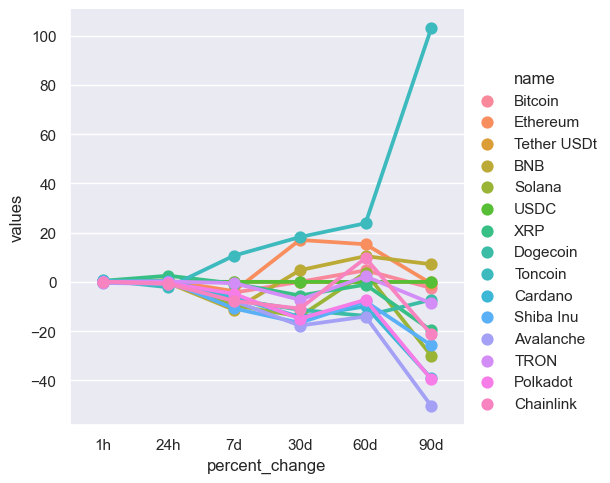

In [98]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [100]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','Timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,Timestamp
0,Bitcoin,66322.63461,2024-06-16 12:50:02.724251
0,Bitcoin,66322.63461,2024-06-16 12:50:02.724251


C:\Users\Maher\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Maher\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Timestamp', ylabel='quote.USD.price'>

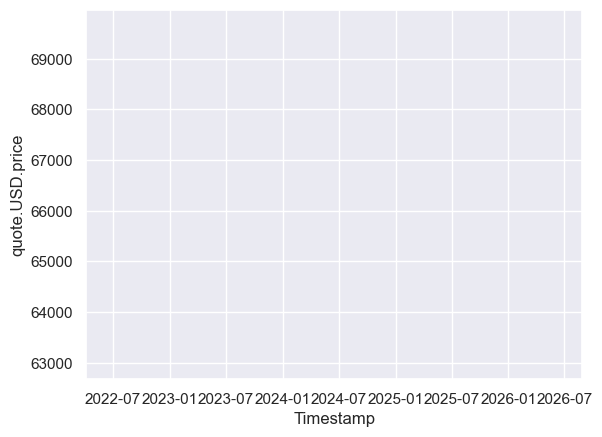

In [102]:
sns.set_style('darkgrid')
sns.lineplot(x='Timestamp', y='quote.USD.price', data = df10)